## 🎓 Persona : Léa, jeune investisseuse étudiante

**Profil :**
- 👩 24 ans, diplômée de l'EM Lyon
- 💼 Première expérience professionnelle après 2 ans d'alternance
- 💰 Aide parentale pour le financement + épargne personnelle (~15 000 €)
- 🎯 Objectif : réaliser un **premier investissement locatif** dans une **ville étudiante dynamique**

---

### 💡 Objectif d'investissement
> Trouver le **meilleur investissement locatif étudiant** possible avec un **budget global de 200 000 €**,  
> en ciblant un **studio à Lille**, tout en comparant brièvement avec un **T1 à Angers ou Nancy**.

---

### 💰 Hypothèses financières
| Élément | Montant estimé |
|----------|----------------|
| Prix d'achat visé | 160 000 – 180 000 € |
| Apport personnel | 15 000 € |
| Prêt immobilier estimé | 180 000 € sur 20 ans |
| Budget total (frais inclus) | **≈ 200 000 €** |
| Objectif de rentabilité brute | **≥ 5 %** |

---

### 🏙️ Cibles principales
| Ville | Type de bien | Prix moyen au m² | Loyer moyen mensuel | Observations |
|-------|---------------|------------------|---------------------|---------------|
| **Lille** | Studio (20–25 m²) | ~4 500 €/m² | 550–600 € | Marché étudiant tendu, forte demande locative |
| **Angers** | T1 (25–30 m²) | ~3 200 €/m² | 450–500 € | Ville très dynamique, bonne rentabilité brute |
| **Nancy** | T1 (25–30 m²) | ~2 800 €/m² | 420–470 € | Marché abordable, bon rapport prix/rentabilité |

---

### 🔍 Besoins data de Léa
- Identifier **les quartiers les plus rentables** à Lille (ou dans des villes comparables)
- Comparer avec **la rentabilité moyenne en France**
- Analyser l'**évolution du prix au m² et des loyers étudiants** depuis 5 ans
- Calculer la **rentabilité locative brute et nette** par quartier
- Visualiser les **zones à forte concentration étudiante**
- Fournir une **recommandation finale : "où investir avec 200k€ ?"**
- Évaluer le **taux de vacance locative** par quartier pour anticiper les périodes creuses (notamment l'été où les étudiants quittent les logements)
- Analyser la **proximité des transports en commun** et des universités/grandes écoles pour identifier les zones les plus attractives pour les étudiants
- Estimer les **charges de copropriété moyennes** par type de bien et par quartier pour affiner le calcul de rentabilité nette
- Identifier les **opportunités de biens nécessitant des travaux** (décote à l'achat) pour maximiser la plus-value à long terme

---

### 🧭 Objectif du notebook
Créer un outil interactif permettant à Léa de :
1. Comparer la rentabilité d'un **studio à Lille** avec celle d'un **T1 à Angers ou Nancy**  
2. Explorer visuellement les **zones à potentiel locatif élevé**  
3. Obtenir une **recommandation automatique** en fonction de son budget et de ses préférences

## Import des bibliothèques ##

In [4]:
!python -m pip install seaborn


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### 1e vision : Analyse générale en France ###

Etude du prix/m^2 par grandes villes etudiantes en France. filtre = appartement, surface de 0 à 45m^2


In [6]:
print("Partie Valentine")

Partie Valentine


In [1]:
Filtrer le DVF avec les 20 plus grandes villes étudiantes de France


SyntaxError: invalid syntax (3670306584.py, line 1)

In [4]:
# Lecture du fichier par morceaux (évite la surcharge mémoire)
chunks = pd.read_csv("valeursfoncieres-2024.txt", sep="|", low_memory=False, chunksize=100000)

# Liste des 20 plus grandes villes étudiantes
villes = ["PARIS","LYON","LILLE","TOULOUSE","BORDEAUX","MARSEILLE","MONTPELLIER","RENNES","STRASBOURG",
          "NANTES","GRENOBLE","NANCY","NICE","ANGERS","ROUEN","CLERMONT-FERRAND","CAEN","DIJON","TOURS","REIMS"]

# Boucle sur chaque portion du fichier
for chunk in chunks:
    # Filtrer les villes étudiantes
    filtre = chunk[chunk["Commune"].isin(villes)]
    
    # Ne garder que les appartements
    filtre = filtre[filtre["Type local"] == "Appartement"]
    
    # Convertir la surface en nombre et filtrer <= 45 m²
    filtre["Surface reelle bati"] = pd.to_numeric(filtre["Surface reelle bati"], errors="coerce")
    filtre = filtre[filtre["Surface reelle bati"] <= 45]
    
    # Enregistrer les lignes filtrées
    filtre.to_csv("dvf_etudiant_filtre.csv", mode="a", index=False)


In [ ]:
DVF encore optimisé pour garder : seulement les colonnes indispensables,les 20 grandes villes étudiantes,les appartements de 0 à 45 m²

In [5]:
# Lecture du fichier filtré
df = pd.read_csv("dvf_etudiant_filtre.csv", low_memory=False)

# Sélection des colonnes utiles
colonnes_utiles = [
    "Date mutation",
    "Nature mutation",
    "Valeur fonciere",
    "Code postal",
    "Commune",
    "Type local",
    "Surface reelle bati"
]
df = df[colonnes_utiles]

# Conversion propre des valeurs foncières
df["Valeur fonciere"] = (
    df["Valeur fonciere"]
    .astype(str)
    .str.replace(",", ".")
    .str.replace(" ", "")
)
df["Valeur fonciere"] = pd.to_numeric(df["Valeur fonciere"], errors="coerce")

# Conversion surface en numérique
df["Surface reelle bati"] = pd.to_numeric(df["Surface reelle bati"], errors="coerce")

# Suppression des lignes avec données manquantes ou aberrantes
df = df.dropna(subset=["Valeur fonciere", "Surface reelle bati", "Type local"])
df = df[df["Valeur fonciere"] > 0]
df = df[df["Surface reelle bati"].between(1, 45)]
df = df[df["Nature mutation"] == "Vente"]

# Filtrer uniquement les appartements
df = df[df["Type local"].str.upper() == "APPARTEMENT"]

# Filtrer les 20 plus grandes villes étudiantes
villes = [
    "PARIS","LYON","LILLE","TOULOUSE","BORDEAUX","MARSEILLE","MONTPELLIER",
    "RENNES","STRASBOURG","NANTES","GRENOBLE","NANCY","NICE","ANGERS",
    "ROUEN","CLERMONT-FERRAND","CAEN","DIJON","TOURS","REIMS"
]
df = df[df["Commune"].isin(villes)]

# Calcul du prix au m²
df["Prix_m2"] = df["Valeur fonciere"] / df["Surface reelle bati"]

# Réorganisation des colonnes
df = df[[
    "Commune",
    "Code postal",
    "Type local",
    "Surface reelle bati",
    "Valeur fonciere",
    "Prix_m2",
    "Date mutation"
]]

# Export du fichier final nettoyé
df.to_csv("dvf_appartements_20villes_0_45m2.csv", index=False)

# Résumé
print("✅ Nettoyage terminé !")
print(f"Lignes conservées : {len(df)}")
print("Fichier créé : dvf_appartements_20villes_0_45m2.csv")


✅ Nettoyage terminé !
Lignes conservées : 20590
Fichier créé : dvf_appartements_20villes_0_45m2.csv


In [ ]:
Script qui permet de calculer le prix moyen au m² achat par ville et sortir un petit classement automatique

In [11]:
# Calcul du prix moyen au m² par ville
prix_moyen = df.groupby("Commune")["Prix_m2"].mean().reset_index()

# Arrondir les valeurs à 2 décimales pour lisibilité
prix_moyen["Prix_m2"] = prix_moyen["Prix_m2"].round(2)

# Trier du plus cher au moins cher
prix_moyen = prix_moyen.sort_values(by="Prix_m2", ascending=False)


# Sauvegarder le tableau dans un fichier CSV
prix_moyen.to_csv("prix_m2_moyen_par_ville.csv", index=False)

print("\n✅ Fichier exporté : prix_m2_moyen_par_ville.csv")



✅ Fichier exporté : prix_m2_moyen_par_ville.csv


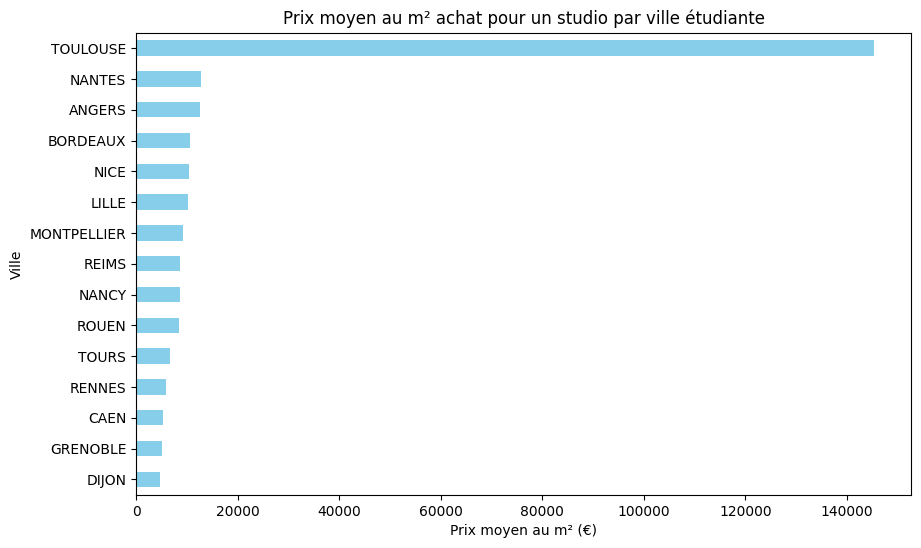

In [7]:
prix_moyen = df.groupby("Commune")["Prix_m2"].mean().sort_values(ascending=True)
plt.figure(figsize=(10,6))
prix_moyen.plot(kind="barh", color="skyblue")
plt.title("Prix moyen au m² achat pour un studio par ville étudiante")
plt.xlabel("Prix moyen au m² (€)")
plt.ylabel("Ville")
plt.show()

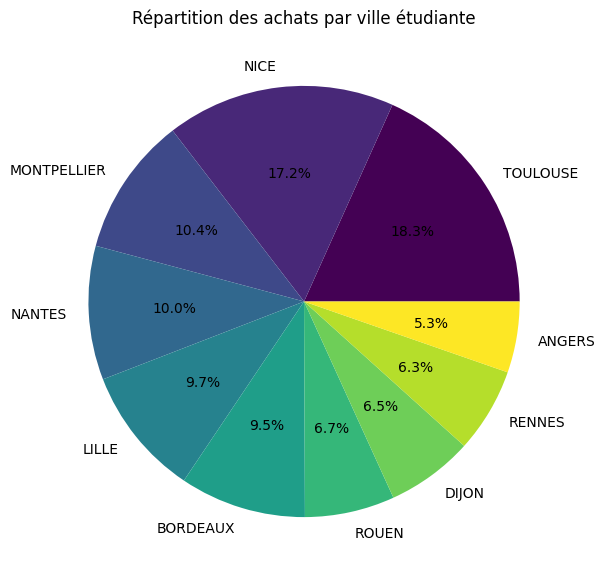

In [12]:
df["Commune"].value_counts().head(10).plot.pie(
    autopct='%1.1f%%', figsize=(7,7), colormap="viridis"
)
plt.title("Répartition des achats par ville étudiante")
plt.ylabel("")
plt.show()


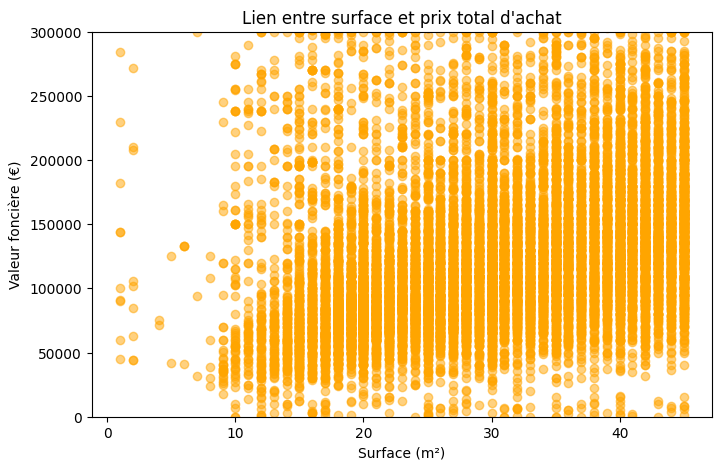

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df["Surface reelle bati"], df["Valeur fonciere"], alpha=0.5, color="orange")
plt.title("Lien entre surface et prix total d'achat")
plt.xlabel("Surface (m²)")
plt.ylabel("Valeur foncière (€)")
plt.ylim(0, 300000)  # limite à 300 000 €
plt.show()
